<a href="https://colab.research.google.com/github/Krykiet/TF_training/blob/main/02_TF_classification_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Creating data to view and fit

from sklearn.datasets import make_circles

# Make 1000 examples
N_SAMPLES = 1000

# Create circles
X, y = make_circles(N_SAMPLES,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


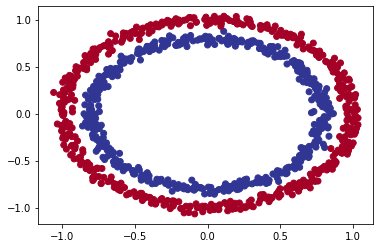

In [6]:
# Visualize circles with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples
len(X), len(y)

(1000, 1000)

In [9]:
# First example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (specified to your problem)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit a model
# model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 10ms/step - loss: 4.3497 - accuracy: 0.4860


[4.349710941314697, 0.4860000014305115]

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Createa a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
# model_2.fit(X, y, epochs=200, verbose=0)
# model_2.evaluate(X, y)

 ### Improving the model

In [13]:
# Set random seed
# tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
# model_3.fit(X, y, epochs=200, verbose=0)
# model_3.evaluate(X, y)

In [15]:
#model_3.summary()

### Prediction data visualization - plot_decision_boundary()

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the diffenet X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class fails)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predictions on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value 
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
Doing binary classification


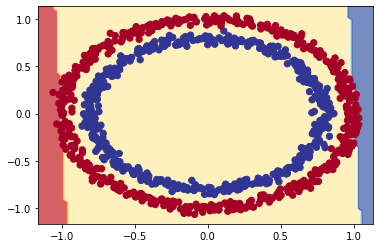

In [18]:
# Check out the predictions of our model
plot_decision_boundary(model=model_3,
                       X=X, 
                       y=y)

In [19]:
# Check if model works for regression
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y= X + 100

# Split into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Create a model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_reg.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

# Fit our model to the regression data
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=200, verbose=0)
model_reg.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 7ms/step - loss: 32.1336 - mae: 32.1336


[32.133602142333984, 32.133602142333984]

2/2 [==============================] - 0s 6ms/step


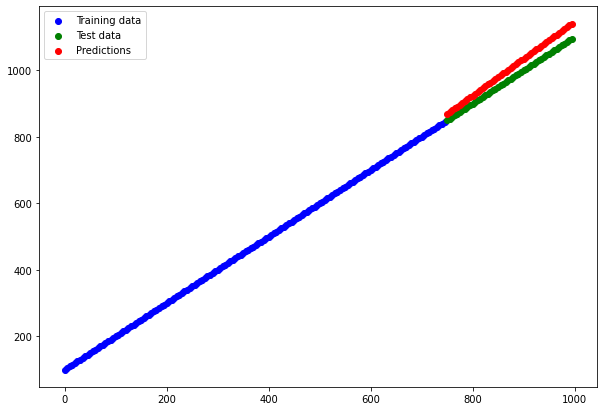

In [20]:
# Make predictions with trained model
y_reg_preds = model_reg.predict(X_reg_test)

# Plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
# history = model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


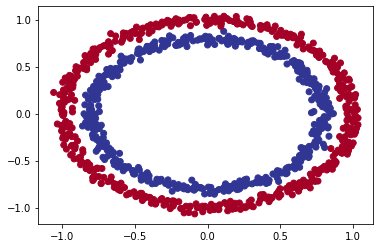

In [22]:
# Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
Doing binary classification


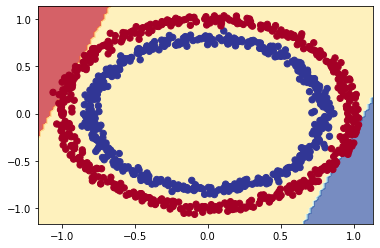

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Not-linear activation functions

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
# history = model_5.fit(X, y, epochs=100)

In [25]:
# Recreate model from TF playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# model_6.fit(X, y, epochs=100, verbose=0)
# model_6.evaluate(X, y)

313/313 [==============================] - 1s 1ms/step
Doing binary classification


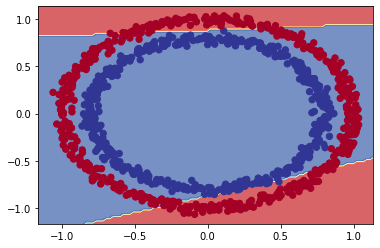

In [26]:
plot_decision_boundary(model_6, X, y)

In [27]:
# Next model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing binary classification


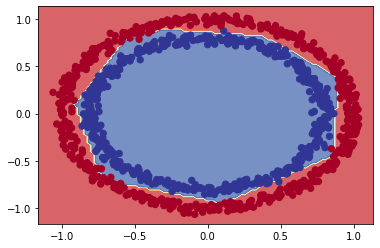

In [28]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [29]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

In [30]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

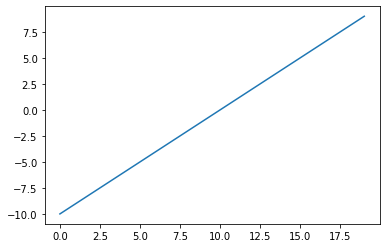

In [31]:
plt.plot(A);

In [32]:
# Replicate sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

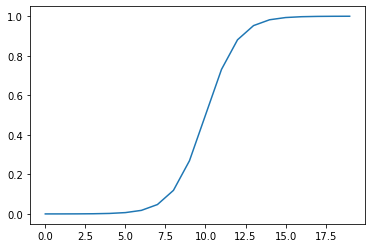

In [33]:
plt.plot(sigmoid(A))

In [34]:
# Replicate ReLU function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

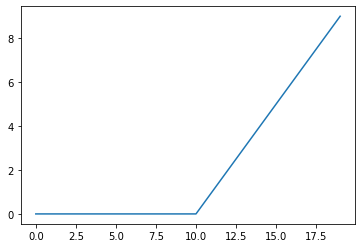

In [35]:
plt.plot(relu(A))

In [36]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

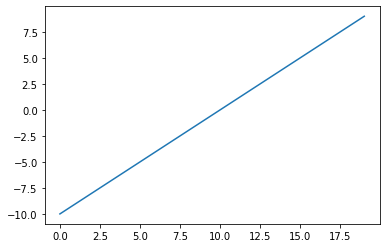

In [37]:
plt.plot(tf.keras.activations.linear(A))

In [38]:
len(X)

1000

In [39]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [40]:
# Recreate model to use proper datasets
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Test the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9950


[0.024508748203516006, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


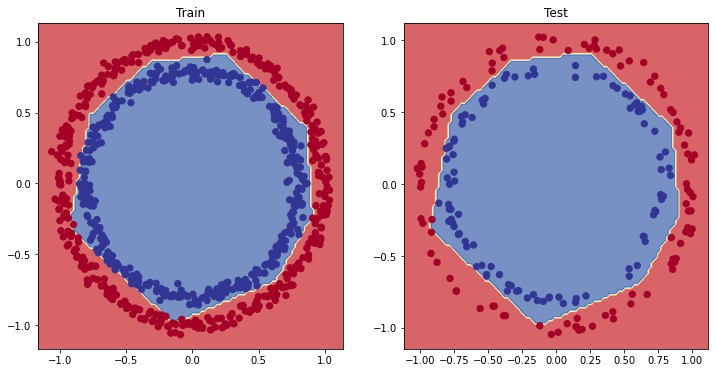

In [41]:
# Plot the decision boudaries for the training ant test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # rows, columns, plot number
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

In [45]:
# Convert the history objest into a DataFrame
h =pd.DataFrame(history.history)

Text(0.5, 1.0, 'Model_8 loss curves')

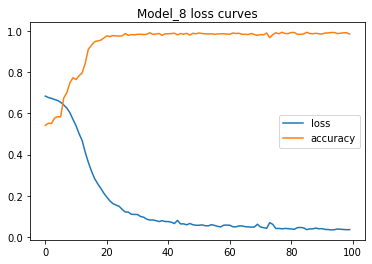

In [44]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

Text(0.5, 1.0, 'Model_8 curves')

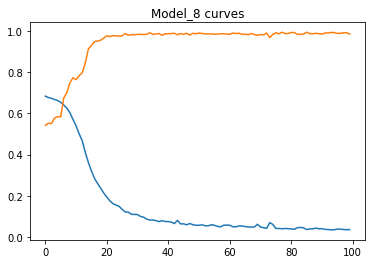

In [54]:
plt.plot(h)
plt.title("Model_8 curves")

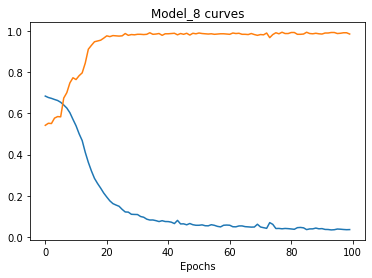

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title("Model_8 curves")
ax.set_xlabel("Epochs")
ax.plot(h)
fig.show()

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["Accuracy"])

# Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6945 - Accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - Accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - Accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - Accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - Accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - Accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - Accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - Accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

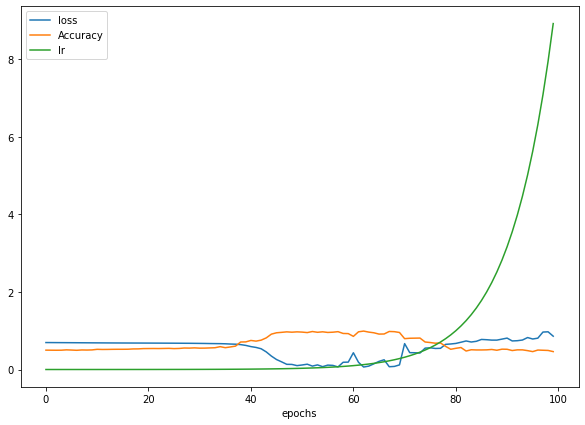

In [62]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

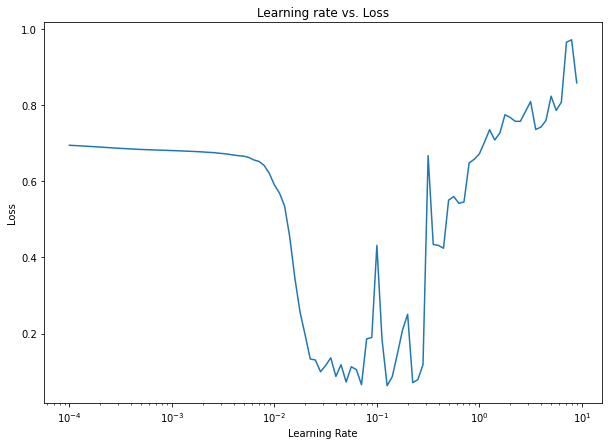

In [65]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # same as the lambda from callback
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # Logarithmic x axis
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")


In [68]:
# Ideal learning rate model
# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 6ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

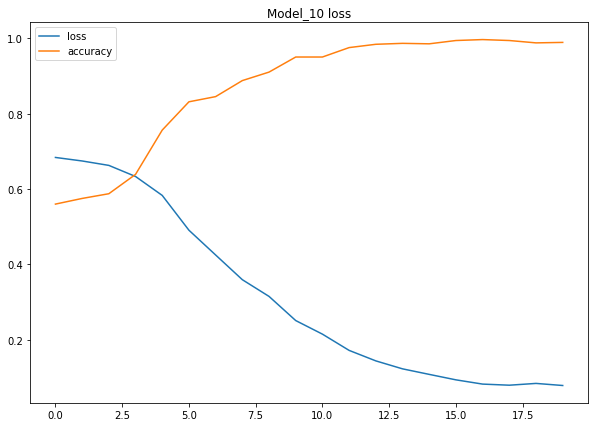

In [70]:
pd.DataFrame(history_10.history).plot(figsize=(10,7), title="Model_10 loss")


In [71]:
# Evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018768966198, 0.9900000095367432]

In [72]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9950


[0.024508748203516006, 0.9950000047683716]

313/313 [==============================] - 1s 4ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


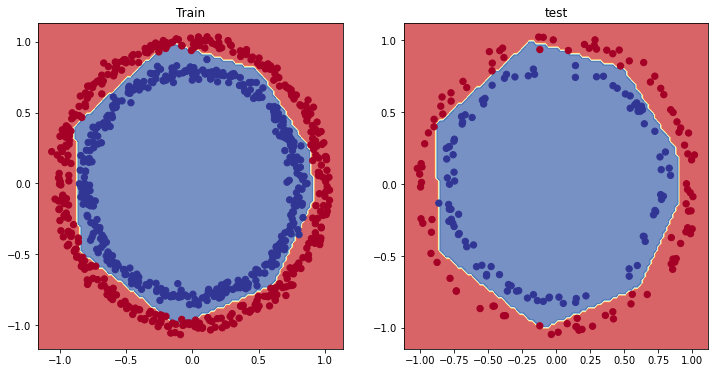

In [73]:
# Decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [87]:
# Accuracy
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.0574018768966198
Model accuracy on the test set: 99.00%


In [101]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Convert preds to binary format
y_preds_binary = tf.round(y_preds)

# Create confusion matrix
confusion_matrix(y_test, y_preds_binary)

7/7 [==============================] - 0s 4ms/step


array([[99,  2],
       [ 0, 99]])

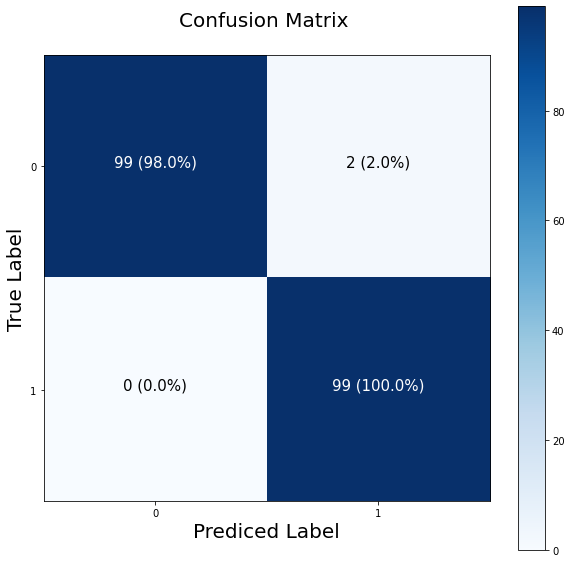

In [127]:
import itertools

figsize = (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize cm
n_classes = cm.shape[0]

# Define figure
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # cm - confusion matrix / colormap
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix ",
       xlabel="Prediced Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black", 
           size=15)

In [122]:
a = np.array([1, 2, 3])
b = a[:, np.newaxis]
c = a[:2, np.newaxis]

In [124]:
a.shape

(3,)

In [125]:
b.shape

(3, 1)

In [126]:
c.shape

(2, 1)